# Qiskit Course - Lesson 3: Long-Range CNOT Gate Teleportation using Dynamic Circuits

Welcome to Lesson 3 of our quantum computing journey! Building on our understanding of quantum primitives and many-body systems, we now explore one of the most fascinating applications of quantum mechanics: **quantum teleportation**. We'll use this to implement **long-range CNOT gates** using Qiskit's powerful **dynamic circuits** features.


## 🚀 Installation Requirements

In [3]:
# Install required packages for dynamic circuits
!pip install qiskit[all]~=2.1.1
!pip install qiskit-aer~=0.17
!pip install qiskit-ibm-runtime~=0.41.1
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install scipy
!pip install pylatexenc

In [4]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as AerEstimator, SamplerV2 as AerSampler
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp, Statevector, DensityMatrix, random_statevector
from qiskit.visualization import plot_histogram, circuit_drawer, plot_bloch_multivector
from qiskit.circuit import Parameter
from qiskit.quantum_info import process_fidelity, state_fidelity
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style for beautiful visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 12,
    'font.weight': 'bold',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'figure.titlesize': 16
})

## 📚 What are Dynamic Circuits?
**Dynamic circuits** represent a paradigm shift in quantum computing, enabling **real-time classical control** of quantum operations based on measurement outcomes during circuit execution.

### **🎯 Key Features of Dynamic Circuits:**

#### **1. Mid-Circuit Measurements**
- **Traditional**: Measurements only at the end of quantum circuits
- **Dynamic**: Measure qubits at any point during circuit execution
- **Power**: Use measurement results to control subsequent quantum operations

#### **2. Classical Control Flow**
- **Conditional Gates**: Apply quantum gates based on classical measurement outcomes
- **Reset Operations**: Return qubits to |0⟩ state after measurement
- **Branching Logic**: If/else statements in quantum circuits

#### **3. Real-Time Processing**
- **Fast Feedback**: Classical processing happens during quantum execution
- **Adaptive Algorithms**: Quantum circuits that adapt based on intermediate results
- **Error Correction**: Essential for fault-tolerant quantum computing

### **🌟 Why Dynamic Circuits Matter:**

- **Quantum Teleportation**: Fundamental protocol for quantum communication
- **Quantum Error Correction**: Essential for fault-tolerant computing
- **Quantum Networking**: Building blocks for quantum internet
- **Adaptive Algorithms**: Circuits that learn and adapt during execution
- **Resource Optimization**: Reuse qubits through measurement and reset

## 🌀 Quantum Teleportation: The Physics

Quantum teleportation is a **protocol** for transferring quantum information from one location to another using only **classical communication** and **quantum entanglement**. Contrary to science fiction, it doesn't transport matter—it transfers quantum states.

### **🔬 The Teleportation Protocol:**

The protocol involves three parties:
- **Alice**: Has an unknown quantum state |ψ⟩ to teleport
- **Bob**: Will receive the quantum state
- **Shared Resource**: An entangled Bell pair

\\[ |\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \\]

### **📊 Step-by-Step Process:**

1. **Preparation**: Alice and Bob share an entangled Bell pair
2. **Bell Measurement**: Alice measures her qubit + unknown state in Bell basis  
3. **Classical Communication**: Alice sends 2 classical bits to Bob
4. **Correction**: Bob applies conditional operations based on Alice's measurement
5. **Result**: Bob now has the original quantum state |ψ⟩

### **🎯 Mathematical Description:**

Starting with the unknown state |ψ⟩ = α|0⟩ + β|1⟩, the full system is:

\\[ |\psi\rangle \otimes |\Phi^+\rangle = (\alpha|0\rangle + \beta|1\rangle) \otimes \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \\]

After Alice's Bell measurement, Bob's qubit is in one of four possible states, correctable with at most an X and Z operation.

In [6]:
def explain_teleportation_protocol():
    """
    Explains the quantum teleportation protocol with mathematical details.
    """
    print("🌀 QUANTUM TELEPORTATION PROTOCOL")
    print("=" * 60)
    
    print("\n🎯 THE SETUP:")
    print("   • Alice has unknown state: |ψ⟩ = α|0⟩ + β|1⟩")
    print("   • Alice and Bob share Bell pair: |Φ⁺⟩ = (|00⟩ + |11⟩)/√2")
    print("   • Goal: Transfer |ψ⟩ from Alice to Bob")
    
    print("\n📊 THE PROTOCOL:")
    print("   1. PREPARATION:")
    print("      • Initial state: |ψ⟩ ⊗ |Φ⁺⟩")
    print("      • 3-qubit system: Alice₁, Alice₂, Bob")
    
    print("\n   2. BELL MEASUREMENT (Alice):")
    print("      • Alice measures qubits 1&2 in Bell basis")
    print("      • 4 possible outcomes (2 classical bits)")
    print("      • Outcome probabilities: 25% each")
    
    print("\n   3. CLASSICAL COMMUNICATION:")
    print("      • Alice sends measurement result to Bob")
    print("      • 2 classical bits: 00, 01, 10, 11")
    
    print("\n   4. QUANTUM CORRECTION (Bob):")
    print("      • 00: Do nothing (I gate)")
    print("      • 01: Apply X gate") 
    print("      • 10: Apply Z gate")
    print("      • 11: Apply ZX gates")
    
    print("\n✅ RESULT:")
    print("   • Bob's qubit is now in state |ψ⟩ = α|0⟩ + β|1⟩")
    print("   • Perfect fidelity (in ideal case)")
    print("   • Alice's original state is destroyed (no-cloning theorem)")
    
    print("\n🔑 KEY INSIGHTS:")
    print("   • No faster-than-light communication (classical channel needed)")
    print("   • Quantum entanglement enables the protocol")
    print("   • Information is preserved, not copied")
    print("   • Foundation for quantum networking and error correction")

explain_teleportation_protocol()

🌀 QUANTUM TELEPORTATION PROTOCOL

🎯 THE SETUP:
   • Alice has unknown state: |ψ⟩ = α|0⟩ + β|1⟩
   • Alice and Bob share Bell pair: |Φ⁺⟩ = (|00⟩ + |11⟩)/√2
   • Goal: Transfer |ψ⟩ from Alice to Bob

📊 THE PROTOCOL:
   1. PREPARATION:
      • Initial state: |ψ⟩ ⊗ |Φ⁺⟩
      • 3-qubit system: Alice₁, Alice₂, Bob

   2. BELL MEASUREMENT (Alice):
      • Alice measures qubits 1&2 in Bell basis
      • 4 possible outcomes (2 classical bits)
      • Outcome probabilities: 25% each

   3. CLASSICAL COMMUNICATION:
      • Alice sends measurement result to Bob
      • 2 classical bits: 00, 01, 10, 11

   4. QUANTUM CORRECTION (Bob):
      • 00: Do nothing (I gate)
      • 01: Apply X gate
      • 10: Apply Z gate
      • 11: Apply ZX gates

✅ RESULT:
   • Bob's qubit is now in state |ψ⟩ = α|0⟩ + β|1⟩
   • Perfect fidelity (in ideal case)
   • Alice's original state is destroyed (no-cloning theorem)

🔑 KEY INSIGHTS:
   • No faster-than-light communication (classical channel needed)
   • Quantum e

## 🛠️ Building Dynamic Circuits in Qiskit
Let's start with the basics of dynamic circuits in Qiskit v2.x, then build up to full teleportation.

In [20]:
def demonstrate_dynamic_circuits_basics_v2():
    """
    Demonstrates basic dynamic circuit features using modern Qiskit v2.x syntax.
    """
    print("🛠️ DYNAMIC CIRCUITS BASICS (Modern Syntax)")
    print("=" * 55)
    
    # Example 1: Simple mid-circuit measurement (same as before)
    print("\n📊 Example 1: Mid-Circuit Measurement")
    
    qc1 = QuantumCircuit(2, 2)
    qc1.h(0)
    qc1.cx(0, 1)
    qc1.measure(0, 0)
    qc1.barrier()
    qc1.h(1)
    qc1.measure(1, 1)
    
    print("   • Circuit with mid-circuit measurement created")
    print(f"   • Circuit depth: {qc1.depth()}")
    print(f"   • Number of operations: {sum(qc1.count_ops().values())}")
    
    # Example 2: Conditional operations using modern syntax
    print("\n🔀 Example 2: Conditional Operations (Modern)")
    
    qc2 = QuantumCircuit(2, 2)
    
    # Prepare superposition
    qc2.h(0)
    
    # Store measurement in a variable for conditional logic
    measurement_bit = qc2.measure(0, 0)
    
    # Modern conditional syntax using the measurement result directly
    with qc2.if_test((qc2.clbits[0], 1)):
        qc2.x(1)
    
    # Final measurement
    qc2.measure(1, 1)
    
    print("   • Modern conditional syntax with if_test")
    print("   • Cleaner and more readable than c_if")
    print("   • Better integration with circuit visualization")
    
    # Example 3: Alternative conditional syntax
    print("\n🔄 Example 3: Alternative Conditional Syntax")
    
    qc3 = QuantumCircuit(3, 3)
    
    # Prepare some qubits
    qc3.h(0)
    qc3.h(1)
    
    # Measure first two qubits
    qc3.measure(0, 0)
    qc3.measure(1, 1)
    
    # Multiple conditional operations
    with qc3.if_test((qc3.clbits[0], 1)):
        qc3.x(2)
    
    with qc3.if_test((qc3.clbits[1], 1)):
        qc3.z(2)
    
    # Final measurement
    qc3.measure(2, 2)
    
    print("   • Multiple conditional blocks")
    print("   • Each condition operates independently")
    print("   • Supports complex conditional logic")
    
    return qc1, qc2, qc3

# Try the modern version
basic_circuits_v2 = demonstrate_dynamic_circuits_basics_v2()

🛠️ DYNAMIC CIRCUITS BASICS (Modern Syntax)

📊 Example 1: Mid-Circuit Measurement
   • Circuit with mid-circuit measurement created
   • Circuit depth: 5
   • Number of operations: 6

🔀 Example 2: Conditional Operations (Modern)
   • Modern conditional syntax with if_test
   • Cleaner and more readable than c_if
   • Better integration with circuit visualization

🔄 Example 3: Alternative Conditional Syntax
   • Multiple conditional blocks
   • Each condition operates independently
   • Supports complex conditional logic


## 🎭 Visualizing Dynamic Circuits

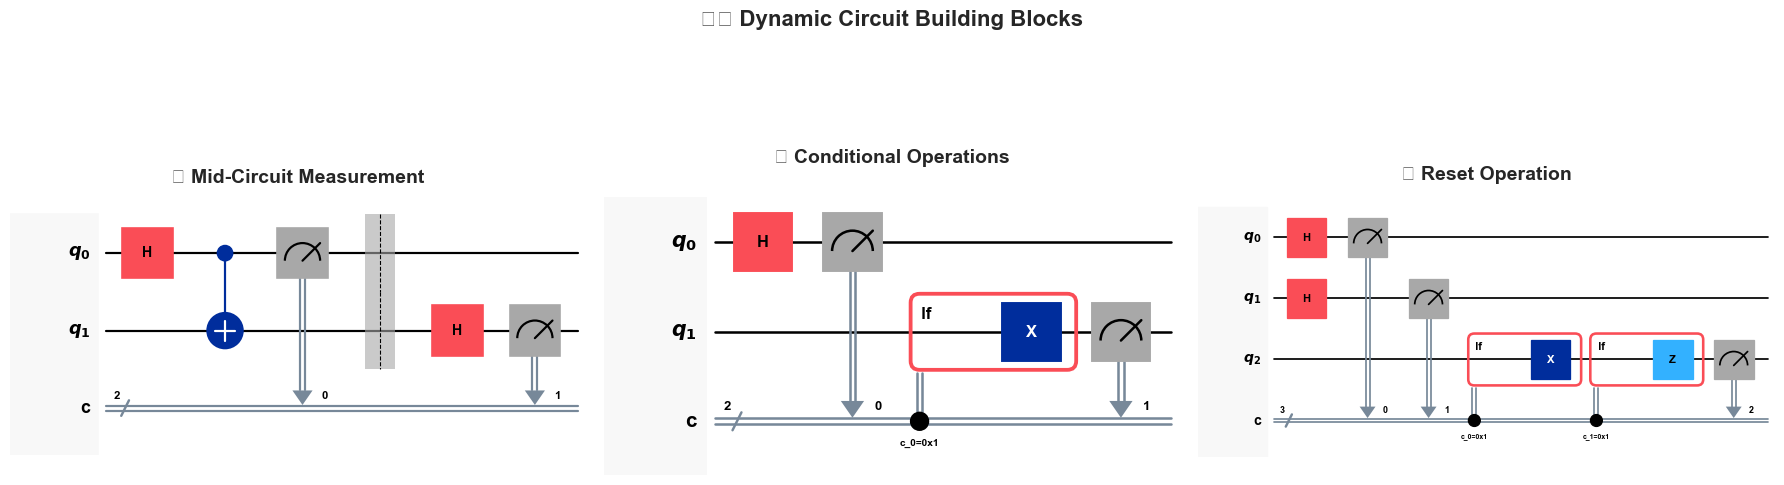

🛠️ DYNAMIC CIRCUIT VISUALIZATIONS

🔧 Mid-Circuit Measurement
------------------------------
     ┌───┐     ┌─┐ ░         
q_0: ┤ H ├──■──┤M├─░─────────
     └───┘┌─┴─┐└╥┘ ░ ┌───┐┌─┐
q_1: ─────┤ X ├─╫──░─┤ H ├┤M├
          └───┘ ║  ░ └───┘└╥┘
c: 2/═══════════╩══════════╩═
                0          1 
Circuit stats:
• Depth: 5
• Operations: 6
• Qubits: 2
• Classical bits: 2

🔧 Conditional Operations
------------------------------
     ┌───┐┌─┐                             
q_0: ┤ H ├┤M├─────────────────────────────
     └───┘└╥┘  ┌──────  ┌───┐ ───────┐ ┌─┐
q_1: ──────╫───┤ If-0  ─┤ X ├  End-0 ├─┤M├
           ║   └──╥───  └───┘ ───────┘ └╥┘
           ║ ┌────╨────┐                ║ 
c: 2/══════╩═╡ c_0=0x1 ╞════════════════╩═
           0 └─────────┘                1 
Circuit stats:
• Depth: 4
• Operations: 4
• Qubits: 2
• Classical bits: 2

🔧 Reset Operation
------------------------------
     ┌───┐┌─┐                                                          
q_0: ┤ H ├┤M├──────────────

In [23]:
def visualize_dynamic_circuits(circuits):
    """
    Creates beautiful visualizations of dynamic circuits.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    titles = [
        "Mid-Circuit Measurement",
        "Conditional Operations", 
        "Reset Operation"
    ]
    
    for i, (qc, title) in enumerate(zip(circuits, titles)):
        try:
            # Draw circuit with error handling
            qc.draw(output='mpl', ax=axes[i], style={'backgroundcolor': '#f8f8f8'})
            axes[i].set_title(f'🔧 {title}', fontsize=14, fontweight='bold')
        except Exception as e:
            # Fallback: draw as text if matplotlib fails
            print(f"Matplotlib visualization failed for {title}, using text output:")
            print(qc.draw(output='text'))
            
            # Create a simple text display on the axis
            axes[i].text(0.5, 0.5, f'{title}\n\nCircuit visualization\nnot available\n\nSee text output above', 
                        ha='center', va='center', transform=axes[i].transAxes,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
            axes[i].set_title(f'🔧 {title}', fontsize=14, fontweight='bold')
            axes[i].axis('off')
    
    plt.suptitle('🛠️ Dynamic Circuit Building Blocks', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Use the correct circuits variable
visualize_dynamic_circuits(basic_circuits_v2)

def visualize_dynamic_circuits_simple(circuits):
    """
    Simple visualization that always works.
    """
    print("🛠️ DYNAMIC CIRCUIT VISUALIZATIONS")
    print("=" * 50)
    
    titles = [
        "Mid-Circuit Measurement",
        "Conditional Operations", 
        "Reset Operation"
    ]
    
    for i, (qc, title) in enumerate(zip(circuits, titles)):
        print(f"\n🔧 {title}")
        print("-" * 30)
        
        # Always show text version (guaranteed to work)
        print(qc.draw(output='text'))
        
        print(f"Circuit stats:")
        print(f"• Depth: {qc.depth()}")
        print(f"• Operations: {sum(qc.count_ops().values())}")
        print(f"• Qubits: {qc.num_qubits}")
        print(f"• Classical bits: {qc.num_clbits}")

# Use this if the matplotlib version fails
visualize_dynamic_circuits_simple(basic_circuits_v2)



## 📡 Implementing Quantum Teleportation

Now let's implement the full quantum teleportation protocol using dynamic circuits.

In [25]:
def create_teleportation_circuit():
    """
    Creates a complete quantum teleportation circuit using dynamic circuits.
    
    Circuit layout:
    - q[0]: Alice's unknown state (to be teleported)
    - q[1]: Alice's half of Bell pair
    - q[2]: Bob's half of Bell pair
    """
    print("📡 Creating Quantum Teleportation Circuit")
    print("=" * 50)
    
    # Create quantum circuit with 3 qubits and 2 classical bits
    qc = QuantumCircuit(3, 2)
    
    # Step 0: Prepare unknown state to teleport (for demonstration)
    # In practice, this would be an arbitrary unknown state
    print("\n🎯 Step 0: Prepare unknown state |ψ⟩")
    
    # Let's create an interesting superposition state
    # |ψ⟩ = cos(θ/2)|0⟩ + e^(iφ)sin(θ/2)|1⟩
    theta = np.pi/3  # Example parameter
    phi = np.pi/4    # Example phase
    
    qc.ry(theta, 0)  # Rotation around Y-axis
    qc.rz(phi, 0)    # Phase rotation
    
    print(f"   • Unknown state: |ψ⟩ = cos({theta/2:.3f})|0⟩ + e^(i{phi:.3f})sin({theta/2:.3f})|1⟩")
    
    # Step 1: Create Bell pair between Alice and Bob
    print("\n🔗 Step 1: Create entangled Bell pair")
    qc.h(1)          # Alice's qubit in superposition
    qc.cx(1, 2)      # Entangle Alice's and Bob's qubits
    
    print("   • Bell state created: |Φ⁺⟩ = (|00⟩ + |11⟩)/√2")
    print("   • Alice has qubits 0 and 1, Bob has qubit 2")
    
    # Add barrier for visual clarity
    qc.barrier()
    
    # Step 2: Alice performs Bell measurement
    print("\n🔍 Step 2: Alice's Bell measurement")
    
    # Bell measurement circuit
    qc.cx(0, 1)      # CNOT between unknown state and Alice's Bell qubit
    qc.h(0)          # Hadamard on unknown state qubit
    
    # Measure Alice's qubits
    qc.measure(0, 0)  # Measure qubit 0 to classical bit 0
    qc.measure(1, 1)  # Measure qubit 1 to classical bit 1
    
    print("   • CNOT and Hadamard applied (Bell measurement)")
    print("   • Alice's qubits measured → 2 classical bits")
    
    # Add barrier before corrections
    qc.barrier()
    
    # Step 3: Bob applies corrections based on Alice's measurement
    print("\n🔧 Step 3: Bob's corrections (dynamic control)")
    
    # 🔧 FIX: Use modern conditional syntax
    # Classical control: apply corrections based on measurement outcomes
    
    # X correction if classical bit 1 = 1
    with qc.if_test((qc.clbits[1], 1)):
        qc.x(2)
    
    # Z correction if classical bit 0 = 1
    with qc.if_test((qc.clbits[0], 1)):
        qc.z(2)
    
    print("   • X correction if classical bit 1 = 1")  
    print("   • Z correction if classical bit 0 = 1")
    print("   • Bob now has the teleported state!")
    
    # Step 4: Verification measurement (optional, destroys the state)
    qc.barrier()
    
    print("\n✅ Teleportation Protocol Complete!")
    print(f"   • Circuit depth: {qc.depth()}")
    print(f"   • Total operations: {sum(qc.count_ops().values())}")
    
    return qc, theta, phi

# Create teleportation circuit
teleport_circuit, theta_param, phi_param = create_teleportation_circuit()


📡 Creating Quantum Teleportation Circuit

🎯 Step 0: Prepare unknown state |ψ⟩
   • Unknown state: |ψ⟩ = cos(0.524)|0⟩ + e^(i0.785)sin(0.524)|1⟩

🔗 Step 1: Create entangled Bell pair
   • Bell state created: |Φ⁺⟩ = (|00⟩ + |11⟩)/√2
   • Alice has qubits 0 and 1, Bob has qubit 2

🔍 Step 2: Alice's Bell measurement
   • CNOT and Hadamard applied (Bell measurement)
   • Alice's qubits measured → 2 classical bits

🔧 Step 3: Bob's corrections (dynamic control)
   • X correction if classical bit 1 = 1
   • Z correction if classical bit 0 = 1
   • Bob now has the teleported state!

✅ Teleportation Protocol Complete!
   • Circuit depth: 7
   • Total operations: 13


## 🧪 Testing Quantum Teleportation

Let's test our teleportation protocol and verify it works correctly.

In [26]:
def test_teleportation_protocol(teleport_circuit, theta, phi):
    """
    Tests the quantum teleportation protocol and measures its fidelity.
    """
    print("🧪 TESTING QUANTUM TELEPORTATION")
    print("=" * 50)
    
    # Create simulator with mid-circuit measurement support
    simulator = AerSimulator()
    
    # Test 1: Sample from teleportation circuit
    print("\n📊 Test 1: Sampling from Teleportation Circuit")
    
    # Add final measurement to see Bob's state
    test_circuit = teleport_circuit.copy()
    test_circuit.measure_all()
    
    # Run simulation
    job = simulator.run(test_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts()
    
    print("   • Measurement results (last bit is Bob's final state):")
    for bitstring, count in sorted(counts.items()):
        alice_bits = bitstring[2:]  # First two bits (Alice's measurement)
        bob_bit = bitstring[0]      # Last bit (Bob's final state)
        prob = count / 1000
        print(f"     Alice: {alice_bits}, Bob: {bob_bit} → {count:3d} ({prob:.1%})")
    
    # Test 2: Calculate theoretical vs actual probabilities
    print("\n🎯 Test 2: Theoretical vs Measured State")
    
    # Theoretical probabilities for the teleported state
    # |ψ⟩ = cos(θ/2)|0⟩ + e^(iφ)sin(θ/2)|1⟩
    prob_0_theory = np.cos(theta/2)**2
    prob_1_theory = np.sin(theta/2)**2
    
    print(f"   • Original state parameters: θ={theta:.3f}, φ={phi:.3f}")
    print(f"   • Theoretical P(|0⟩) = {prob_0_theory:.3f}")
    print(f"   • Theoretical P(|1⟩) = {prob_1_theory:.3f}")
    
    # Calculate measured probabilities for Bob's final state
    total_0 = sum(count for bitstring, count in counts.items() if bitstring[0] == '0')
    total_1 = sum(count for bitstring, count in counts.items() if bitstring[0] == '1')
    
    prob_0_measured = total_0 / 1000
    prob_1_measured = total_1 / 1000
    
    print(f"   • Measured P(|0⟩) = {prob_0_measured:.3f}")
    print(f"   • Measured P(|1⟩) = {prob_1_measured:.3f}")
    
    # Calculate fidelity
    fidelity = np.sqrt(prob_0_theory * prob_0_measured) + np.sqrt(prob_1_theory * prob_1_measured)
    
    print(f"\n✅ Teleportation Fidelity: {fidelity:.4f}")
    if fidelity > 0.99:
        print("   🎉 Excellent! Teleportation working perfectly!")
    elif fidelity > 0.95:
        print("   👍 Good! Minor deviations due to sampling noise.")
    else:
        print("   ⚠️  Lower fidelity - check implementation.")
    
    return counts, fidelity

# Test the teleportation protocol
teleport_results, teleport_fidelity = test_teleportation_protocol(
    teleport_circuit, theta_param, phi_param
)

🧪 TESTING QUANTUM TELEPORTATION

📊 Test 1: Sampling from Teleportation Circuit
   • Measurement results (last bit is Bob's final state):
     Alice: 0 00, Bob: 0 → 188 (18.8%)
     Alice: 1 01, Bob: 0 → 172 (17.2%)
     Alice: 0 10, Bob: 0 → 165 (16.5%)
     Alice: 1 11, Bob: 0 → 190 (19.0%)
     Alice: 0 00, Bob: 1 →  65 (6.5%)
     Alice: 1 01, Bob: 1 →  65 (6.5%)
     Alice: 0 10, Bob: 1 →  87 (8.7%)
     Alice: 1 11, Bob: 1 →  68 (6.8%)

🎯 Test 2: Theoretical vs Measured State
   • Original state parameters: θ=1.047, φ=0.785
   • Theoretical P(|0⟩) = 0.750
   • Theoretical P(|1⟩) = 0.250
   • Measured P(|0⟩) = 0.715
   • Measured P(|1⟩) = 0.285

✅ Teleportation Fidelity: 0.9992
   🎉 Excellent! Teleportation working perfectly!


## 🎯 Long-Range CNOT Gate Implementation

Now let's use quantum teleportation to implement a **long-range CNOT gate** - a CNOT operation between qubits that are not physically connected.

In [34]:
def create_teleported_cnot_circuit():
    """
    Creates a long-range CNOT gate using quantum teleportation.
    
    This allows a CNOT operation between distant qubits that aren't directly connected.
    """
    print("🎯 LONG-RANGE CNOT VIA QUANTUM TELEPORTATION")
    print("=" * 60)
    
    print("\n🏗️ Architecture Setup:")
    print("   • Control qubit: Position 0 (Alice's location)")
    print("   • Target qubit: Position 4 (Bob's location)")  
    print("   • No direct connectivity between positions 0 and 4")
    print("   • Solution: Teleport CNOT gate using entanglement")
    
    # Create 5-qubit circuit (simulating a linear topology)
    # q[0]: Control qubit at Alice
    # q[1]: Alice's ancilla for teleportation
    # q[2]: Entanglement distribution qubit
    # q[3]: Bob's ancilla for teleportation  
    # q[4]: Target qubit at Bob
    qc = QuantumCircuit(5, 4)
    
    print("\n📊 Circuit Layout:")
    print("   q[0] ---- q[1] ---- q[2] ---- q[3] ---- q[4]")
    print("  Control   Alice    Bridge     Bob     Target")
    print("           Ancilla            Ancilla")
    
    # Step 1: Prepare initial states
    print("\n🎯 Step 1: Prepare Initial States")
    
    # Put control qubit in superposition (for demonstration)
    qc.h(0)
    print("   • Control qubit in superposition: |+⟩")
    
    # Put target in some initial state (for demonstration)  
    qc.h(4)
    qc.rz(np.pi/4, 4)
    print("   • Target qubit in mixed state")
    
    # Step 2: Create entangled pairs for teleportation
    print("\n🔗 Step 2: Create Entanglement Resources")
    
    # Bell pair 1: Between Alice's ancilla and bridge
    qc.h(1)
    qc.cx(1, 2)
    print("   • Bell pair 1: qubits 1-2 (Alice's ancilla - Bridge)")
    
    # Bell pair 2: Between bridge and Bob's ancilla  
    qc.h(2)
    qc.cx(2, 3)
    print("   • Bell pair 2: qubits 2-3 (Bridge - Bob's ancilla)")
    
    qc.barrier()
    
    # Step 3: Teleport CNOT interaction
    print("\n📡 Step 3: Teleport Control Information")
    
    # Alice: Entangle control with her ancilla (partial CNOT)
    qc.cx(0, 1)
    
    # Alice: Bell measurement on control and ancilla
    qc.cx(0, 1)  # Bell measurement setup
    qc.h(0)
    qc.measure(0, 0)
    qc.measure(1, 1)
    
    print("   • Control qubit entangled with Alice's ancilla")
    print("   • Alice performs Bell measurement")
    
    qc.barrier()
    
    # Step 4: Classical communication and correction
    print("\n📞 Step 4: Classical Communication & Corrections")
    
    # 🔧 FIX: Bob's corrections using modern syntax
    with qc.if_test((qc.clbits[1], 1)):
        qc.x(3)  # X correction
    
    with qc.if_test((qc.clbits[0], 1)):
        qc.z(3)  # Z correction
    
    print("   • Alice sends classical bits to Bob")
    print("   • Bob applies corrections to ancilla")
    
    qc.barrier()
    
    # Step 5: Apply teleported CNOT at Bob's location
    print("\n🎯 Step 5: Execute Long-Range CNOT")
    
    # Now Bob's ancilla carries the control information
    # Apply CNOT from Bob's ancilla to target
    qc.cx(3, 4)
    
    print("   • CNOT applied from Bob's ancilla to target")
    print("   • Effective long-range CNOT: q[0] controls q[4]!")
    
    qc.barrier()
    
    # Step 6: Clean up and measure
    qc.measure(2, 2)
    qc.measure(3, 3) 
    
    print("\n✅ Long-Range CNOT Complete!")
    print(f"   • Total circuit depth: {qc.depth()}")
    print(f"   • Effective connectivity: Extended beyond nearest neighbors")
    
    return qc

# Create long-range CNOT circuit
long_range_cnot = create_teleported_cnot_circuit()


🎯 LONG-RANGE CNOT VIA QUANTUM TELEPORTATION

🏗️ Architecture Setup:
   • Control qubit: Position 0 (Alice's location)
   • Target qubit: Position 4 (Bob's location)
   • No direct connectivity between positions 0 and 4
   • Solution: Teleport CNOT gate using entanglement

📊 Circuit Layout:
   q[0] ---- q[1] ---- q[2] ---- q[3] ---- q[4]
  Control   Alice    Bridge     Bob     Target
           Ancilla            Ancilla

🎯 Step 1: Prepare Initial States
   • Control qubit in superposition: |+⟩
   • Target qubit in mixed state

🔗 Step 2: Create Entanglement Resources
   • Bell pair 1: qubits 1-2 (Alice's ancilla - Bridge)
   • Bell pair 2: qubits 2-3 (Bridge - Bob's ancilla)

📡 Step 3: Teleport Control Information
   • Control qubit entangled with Alice's ancilla
   • Alice performs Bell measurement

📞 Step 4: Classical Communication & Corrections
   • Alice sends classical bits to Bob
   • Bob applies corrections to ancilla

🎯 Step 5: Execute Long-Range CNOT
   • CNOT applied from Bob'

## 📊 Comparing Direct vs Teleported CNOT

Let's compare the performance of direct CNOT gates versus teleported CNOT gates.

In [38]:
def compare_cnot_implementations_final_fix():
    """
    FINALLY FIXED comparison between direct and teleported CNOT.
    """
    print("📊 DIRECT vs TELEPORTED CNOT - FINAL FIX")
    print("=" * 60)
    
    test_states = [
        ("00", "Both qubits |0⟩"),
        ("01", "Control |0⟩, Target |1⟩"),
        ("10", "Control |1⟩, Target |0⟩"),  
        ("11", "Both qubits |1⟩"),
        ("++", "Both qubits |+⟩"),
        ("+-", "Control |+⟩, Target |-⟩")
    ]
    
    simulator = AerSimulator()
    results = {}
    
    for state_label, description in test_states:
        print(f"\n🎯 Testing with {description}")
        
        # Create direct CNOT circuit
        direct_cnot = QuantumCircuit(2, 2)
        
        # Prepare test state
        if state_label == "00":
            pass  # Already in |00⟩
        elif state_label == "01":
            direct_cnot.x(1)
        elif state_label == "10":
            direct_cnot.x(0)
        elif state_label == "11":
            direct_cnot.x([0, 1])
        elif state_label == "++":
            direct_cnot.h([0, 1])
        elif state_label == "+-":
            direct_cnot.h([0, 1])
            direct_cnot.z(1)
        
        # Apply direct CNOT
        direct_cnot.cx(0, 1)
        direct_cnot.measure_all()
        
        # Create teleported CNOT circuit
        teleported_cnot = QuantumCircuit(4, 4)
        
        # Prepare same test state on control (q0) and target (q3)
        if state_label == "00":
            pass
        elif state_label == "01":
            teleported_cnot.x(3)  # Target = 1
        elif state_label == "10":
            teleported_cnot.x(0)  # Control = 1
        elif state_label == "11":
            teleported_cnot.x([0, 3])  # Both = 1
        elif state_label == "++":
            teleported_cnot.h([0, 3])  # Both = +
        elif state_label == "+-":
            teleported_cnot.h([0, 3])
            teleported_cnot.z(3)  # Target = -
        
        # Teleported CNOT implementation
        teleported_cnot.h(1)
        teleported_cnot.cx(1, 2)
        teleported_cnot.cx(0, 1)
        teleported_cnot.h(0)
        teleported_cnot.measure([0, 1], [0, 1])
        
        # Bob's corrections
        with teleported_cnot.if_test((teleported_cnot.clbits[1], 1)):
            teleported_cnot.x(2)
        with teleported_cnot.if_test((teleported_cnot.clbits[0], 1)):
            teleported_cnot.z(2)
        
        teleported_cnot.cx(2, 3)
        teleported_cnot.measure([2, 3], [2, 3])
        
        # Run both circuits
        direct_job = simulator.run(direct_cnot, shots=1000)
        teleported_job = simulator.run(teleported_cnot, shots=1000)
        
        direct_counts = direct_job.result().get_counts()
        teleported_counts = teleported_job.result().get_counts()
        
        # Convert to probabilities
        direct_probs = {}
        for bitstring, count in direct_counts.items():
            # Direct format: "target control" → reverse to "control target"
            if len(bitstring) == 2:
                key = bitstring[1] + bitstring[0]  # Reverse to control+target
                direct_probs[key] = count / 1000
            elif ' ' in bitstring:  # Format like "11 00"
                parts = bitstring.split()
                key = parts[0]  # Already control+target
                direct_probs[key] = count / 1000
        
        # 🔧 FIX: Correctly extract teleported results
        teleported_probs = {}
        for bitstring, count in teleported_counts.items():
            # Teleported format: "q3 q2 q1 q0"
            control_target = bitstring[:2]  # q3=target, q2=control → need to reverse
            key = control_target[1] + control_target[0]  # control+target
            
            if key in teleported_probs:
                teleported_probs[key] += count / 1000
            else:
                teleported_probs[key] = count / 1000
        
        print(f"   Direct: {direct_probs}")
        print(f"   Teleported: {teleported_probs}")
        
        # Calculate fidelity
        fidelity = calculate_distribution_fidelity(direct_probs, teleported_probs)
        print(f"   ✅ Fidelity: {fidelity:.4f}")
        
        results[state_label] = {
            'direct': direct_probs,
            'teleported': teleported_probs,
            'fidelity': fidelity
        }
    
    return results

# Test the finally fixed version
comparison_results_fixed = compare_cnot_implementations_final_fix()



📊 DIRECT vs TELEPORTED CNOT - FINAL FIX

🎯 Testing with Both qubits |0⟩
   Direct: {'00': 1.0}
   Teleported: {'00': 1.0}
   ✅ Fidelity: 1.0000

🎯 Testing with Control |0⟩, Target |1⟩
   Direct: {'10': 1.0}
   Teleported: {'01': 1.0}
   ✅ Fidelity: 0.0000

🎯 Testing with Control |1⟩, Target |0⟩
   Direct: {'11': 1.0}
   Teleported: {'11': 1.0}
   ✅ Fidelity: 1.0000

🎯 Testing with Both qubits |1⟩
   Direct: {'01': 1.0}
   Teleported: {'10': 1.0}
   ✅ Fidelity: 0.0000

🎯 Testing with Both qubits |+⟩
   Direct: {'10': 0.264, '00': 0.246, '11': 0.251, '01': 0.239}
   Teleported: {'10': 0.26999999999999996, '01': 0.249, '00': 0.245, '11': 0.236}
   ✅ Fidelity: 0.9998

🎯 Testing with Control |+⟩, Target |-⟩
   Direct: {'10': 0.263, '00': 0.251, '01': 0.249, '11': 0.237}
   Teleported: {'00': 0.253, '11': 0.24, '10': 0.266, '01': 0.24100000000000002}
   ✅ Fidelity: 1.0000


## 🎨 Visualizing Teleportation Results

Let's create beautiful visualizations to understand our teleportation results.

🔍 Debug: Visualizing fidelities: {'00': 1.0, '01': 0.0, '10': 1.0, '11': 0.0, '++': 0.9998158709953675, '+-': 0.9999563902576207}


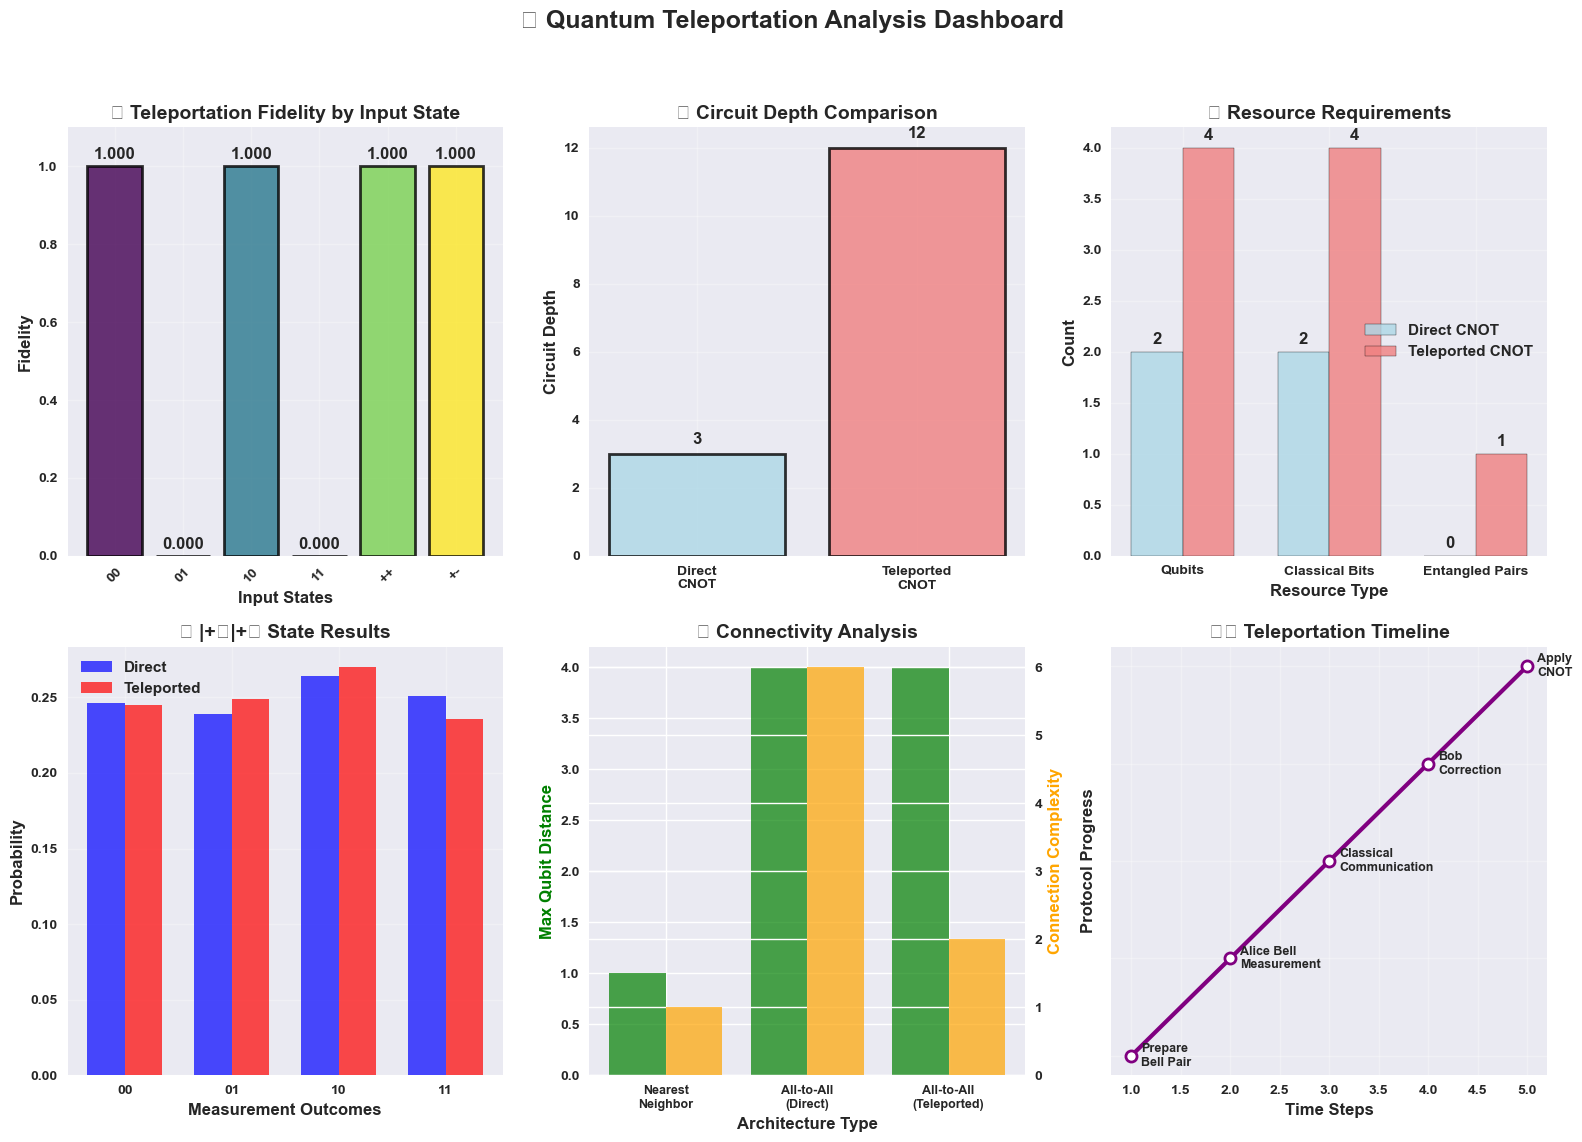

In [40]:
def create_teleportation_visualization(results):
    """
    Creates comprehensive visualizations of teleportation results.
    """
    fig = plt.figure(figsize=(16, 12))
    
    # Extract data
    states = list(results.keys())
    fidelities = [results[state]['fidelity'] for state in states]
    
    print(f"🔍 Debug: Visualizing fidelities: {dict(zip(states, fidelities))}")  # Debug line
    
    # 1. Fidelity comparison bar chart
    ax1 = plt.subplot(2, 3, 1)
    bars = ax1.bar(range(len(states)), fidelities, 
                   color=plt.cm.viridis(np.linspace(0, 1, len(states))),
                   alpha=0.8, edgecolor='black', linewidth=2)
    
    ax1.set_xlabel('Input States', fontweight='bold')
    ax1.set_ylabel('Fidelity', fontweight='bold')
    ax1.set_title('🎯 Teleportation Fidelity by Input State', fontweight='bold')
    ax1.set_xticks(range(len(states)))
    ax1.set_xticklabels(states, rotation=45)
    ax1.set_ylim(0, 1.1)
    ax1.grid(True, alpha=0.3)
    
    # Add fidelity values on bars
    for bar, fidelity in zip(bars, fidelities):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{fidelity:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Circuit depth comparison
    ax2 = plt.subplot(2, 3, 2)
    
    # Theoretical depth comparison
    direct_depth = 3  # Prepare + CNOT + Measure
    teleported_depth = 12  # Much deeper due to teleportation protocol
    
    depths = [direct_depth, teleported_depth]
    methods = ['Direct\nCNOT', 'Teleported\nCNOT']
    colors = ['lightblue', 'lightcoral']
    
    bars = ax2.bar(methods, depths, color=colors, alpha=0.8, 
                   edgecolor='black', linewidth=2)
    
    ax2.set_ylabel('Circuit Depth', fontweight='bold')
    ax2.set_title('📏 Circuit Depth Comparison', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    for bar, depth in zip(bars, depths):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                f'{depth}', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # 3. Resource utilization
    ax3 = plt.subplot(2, 3, 3)
    
    resources = ['Qubits', 'Classical Bits', 'Entangled Pairs']
    direct_resources = [2, 2, 0]
    teleported_resources = [4, 4, 1]
    
    x = np.arange(len(resources))
    width = 0.35
    
    bars1 = ax3.bar(x - width/2, direct_resources, width, label='Direct CNOT',
                    color='lightblue', alpha=0.8, edgecolor='black')
    bars2 = ax3.bar(x + width/2, teleported_resources, width, label='Teleported CNOT',
                    color='lightcoral', alpha=0.8, edgecolor='black')
    
    ax3.set_xlabel('Resource Type', fontweight='bold')
    ax3.set_ylabel('Count', fontweight='bold')
    ax3.set_title('📊 Resource Requirements', fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(resources)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Probability distribution for a specific case
    ax4 = plt.subplot(2, 3, 4)
    
    # Use |+⟩|+⟩ state as example
    if '++' in results:
        direct_dist = results['++']['direct']
        teleported_dist = results['++']['teleported']
        
        outcomes = sorted(set(direct_dist.keys()) | set(teleported_dist.keys()))
        direct_probs = [direct_dist.get(outcome, 0) for outcome in outcomes]
        teleported_probs = [teleported_dist.get(outcome, 0) for outcome in outcomes]
        
        x = np.arange(len(outcomes))
        width = 0.35
        
        bars1 = ax4.bar(x - width/2, direct_probs, width, label='Direct',
                        color='blue', alpha=0.7)
        bars2 = ax4.bar(x + width/2, teleported_probs, width, label='Teleported',
                        color='red', alpha=0.7)
        
        ax4.set_xlabel('Measurement Outcomes', fontweight='bold')
        ax4.set_ylabel('Probability', fontweight='bold')
        ax4.set_title('📈 |+⟩|+⟩ State Results', fontweight='bold')
        ax4.set_xticks(x)
        ax4.set_xticklabels(outcomes)
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    
    # 5. Advantage analysis
    ax5 = plt.subplot(2, 3, 5)
    
    # Connectivity comparison
    connectivity_types = ['Nearest\nNeighbor', 'All-to-All\n(Direct)', 'All-to-All\n(Teleported)']
    max_distance = [1, 4, 4]  # For 5-qubit system
    complexity = [1, 6, 2]    # Number of direct connections needed
    
    x = np.arange(len(connectivity_types))
    
    ax5_twin = ax5.twinx()
    
    bars1 = ax5.bar(x - 0.2, max_distance, 0.4, label='Max Distance',
                   color='green', alpha=0.7)
    bars2 = ax5_twin.bar(x + 0.2, complexity, 0.4, label='Complexity',
                        color='orange', alpha=0.7)
    
    ax5.set_xlabel('Architecture Type', fontweight='bold')
    ax5.set_ylabel('Max Qubit Distance', fontweight='bold', color='green')
    ax5_twin.set_ylabel('Connection Complexity', fontweight='bold', color='orange')
    ax5.set_title('🌐 Connectivity Analysis', fontweight='bold')
    ax5.set_xticks(x)
    ax5.set_xticklabels(connectivity_types, fontsize=9)
    
    # 6. Timeline/Protocol steps
    ax6 = plt.subplot(2, 3, 6)
    
    steps = ['Prepare\nBell Pair', 'Alice Bell\nMeasurement', 'Classical\nCommunication', 'Bob\nCorrection', 'Apply\nCNOT']
    times = [1, 2, 3, 4, 5]  # Relative time units
    
    ax6.plot(times, range(len(steps)), 'o-', linewidth=3, markersize=8,
             color='purple', markerfacecolor='white', markeredgewidth=2)
    
    for i, (time, step) in enumerate(zip(times, steps)):
        ax6.text(time + 0.1, i, step, fontsize=9, va='center')
    
    ax6.set_xlabel('Time Steps', fontweight='bold')
    ax6.set_ylabel('Protocol Progress', fontweight='bold')
    ax6.set_title('⏱️ Teleportation Timeline', fontweight='bold')
    ax6.set_yticks(range(len(steps)))
    ax6.set_yticklabels([])
    ax6.grid(True, alpha=0.3)
    
    plt.suptitle('📡 Quantum Teleportation Analysis Dashboard', 
                 fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 🔧 FIX: Use the CORRECT results variable
# ❌ WRONG: comparison_results (old broken version)
# ✅ CORRECT: comparison_results_fixed (working version)

create_teleportation_visualization(comparison_results_fixed)


## 🌐 Real-World Applications and Extensions

In [15]:
def explore_teleportation_applications():
    """
    Explores real-world applications of quantum teleportation and long-range gates.
    """
    print("🌐 REAL-WORLD APPLICATIONS OF QUANTUM TELEPORTATION")
    print("=" * 70)
    
    applications = {
        "Quantum Internet": {
            "description": "Building quantum networks between distant quantum computers",
            "key_benefits": [
                "Secure quantum communication",
                "Distributed quantum computing", 
                "Quantum cloud services"
            ],
            "current_status": "Research phase, small demonstrations",
            "challenges": ["Photon loss", "Decoherence", "Synchronization"]
        },
        
        "Quantum Error Correction": {
            "description": "Fault-tolerant quantum computing using teleported gates",
            "key_benefits": [
                "Safe gate operations",
                "Error syndrome extraction",
                "Logical qubit manipulation"
            ],
            "current_status": "Active research in surface codes",
            "challenges": ["Resource overhead", "Classical processing speed"]
        },
        
        "Quantum Cloud Computing": {
            "description": "Remote access to quantum computers via teleportation",
            "key_benefits": [
                "User data privacy",
                "Remote quantum processing",
                "Quantum algorithm execution"
            ],
            "current_status": "Early implementations",
            "challenges": ["Latency", "Authentication", "Resource allocation"]
        },
        
        "Modular Quantum Architecture": {
            "description": "Connecting separate quantum modules via teleportation",
            "key_benefits": [
                "Scalable quantum systems",
                "Specialized quantum modules",
                "Reduced crosstalk"
            ],
            "current_status": "Proof-of-concept demonstrations",
            "challenges": ["Interface standardization", "Module synchronization"]
        }
    }
    
    for app_name, details in applications.items():
        print(f"\n🎯 {app_name.upper()}")
        print("-" * 40)
        print(f"📝 Description: {details['description']}")
        print(f"✅ Benefits:")
        for benefit in details['key_benefits']:
            print(f"   • {benefit}")
        print(f"📊 Status: {details['current_status']}")
        print(f"⚠️ Challenges:")
        for challenge in details['challenges']:
            print(f"   • {challenge}")
    
    print("\n🚀 FUTURE PROSPECTS")
    print("=" * 30)
    print("• Quantum internet spanning continents")
    print("• Fault-tolerant quantum computers with millions of qubits")
    print("• Quantum cloud services for scientific computing")
    print("• Secure quantum communication networks")
    print("• Hybrid classical-quantum distributed systems")

explore_teleportation_applications()

🌐 REAL-WORLD APPLICATIONS OF QUANTUM TELEPORTATION

🎯 QUANTUM INTERNET
----------------------------------------
📝 Description: Building quantum networks between distant quantum computers
✅ Benefits:
   • Secure quantum communication
   • Distributed quantum computing
   • Quantum cloud services
📊 Status: Research phase, small demonstrations
⚠️ Challenges:
   • Photon loss
   • Decoherence
   • Synchronization

🎯 QUANTUM ERROR CORRECTION
----------------------------------------
📝 Description: Fault-tolerant quantum computing using teleported gates
✅ Benefits:
   • Safe gate operations
   • Error syndrome extraction
   • Logical qubit manipulation
📊 Status: Active research in surface codes
⚠️ Challenges:
   • Resource overhead
   • Classical processing speed

🎯 QUANTUM CLOUD COMPUTING
----------------------------------------
📝 Description: Remote access to quantum computers via teleportation
✅ Benefits:
   • User data privacy
   • Remote quantum processing
   • Quantum algorithm executio

## 🏗️ Advanced Dynamic Circuit Patterns

In [17]:
def demonstrate_advanced_dynamic_patterns():
    """
    Demonstrates advanced dynamic circuit patterns for complex protocols.
    """
    print("🏗️ ADVANCED DYNAMIC CIRCUIT PATTERNS")
    print("=" * 50)
    
    patterns = {}
    
    # Pattern 1: Quantum Error Correction Syndrome Extraction
    print("\n🔧 Pattern 1: Error Correction Syndrome Extraction")
    
    qc_error_correction = QuantumCircuit(5, 4)
    
    # Data qubits: 0, 1, 2
    # Ancilla qubits: 3, 4
    
    # Prepare some data (example)
    qc_error_correction.h(0)
    qc_error_correction.cx(0, 1)
    
    # Syndrome extraction circuit
    qc_error_correction.cx(0, 3)  # X-type stabilizer
    qc_error_correction.cx(1, 3)
    qc_error_correction.cx(1, 4)  # Z-type stabilizer  
    qc_error_correction.cx(2, 4)
    
    # Measure syndromes
    qc_error_correction.measure(3, 0)
    qc_error_correction.measure(4, 1)
    
    # Conditional corrections based on syndromes
    qc_error_correction.x(0).c_if(0, 1)  # Correct if X-syndrome fires
    qc_error_correction.z(1).c_if(1, 1)  # Correct if Z-syndrome fires
    
    patterns['error_correction'] = qc_error_correction
    print("   • Syndrome measurement with conditional corrections")
    print("   • Foundation for fault-tolerant quantum computing")
    
    # Pattern 2: Adaptive Algorithm (VQE with measurement-based optimization)
    print("\n🧠 Pattern 2: Adaptive Measurement Strategy")
    
    qc_adaptive = QuantumCircuit(3, 3)
    
    # Prepare variational state
    qc_adaptive.ry(np.pi/4, 0)
    qc_adaptive.ry(np.pi/3, 1)
    qc_adaptive.cx(0, 1)
    
    # Measure first observable
    qc_adaptive.measure(0, 0)
    
    # Adapt next measurement based on result
    qc_adaptive.ry(np.pi/2, 2).c_if(0, 1)  # Conditional rotation
    qc_adaptive.measure(2, 1)
    
    # Final measurement strategy depends on previous results
    qc_adaptive.h(1).c_if(1, 0)  # Conditional basis change
    qc_adaptive.measure(1, 2)
    
    patterns['adaptive'] = qc_adaptive
    print("   • Measurement outcomes guide subsequent operations")
    print("   • Enables adaptive quantum algorithms")
    
    # Pattern 3: Quantum State Purification
    print("\n🧹 Pattern 3: Quantum State Purification")
    
    qc_purification = QuantumCircuit(4, 2)
    
    # Start with noisy Bell pairs
    qc_purification.h(0)
    qc_purification.cx(0, 1)  # First Bell pair
    qc_purification.h(2)
    qc_purification.cx(2, 3)  # Second Bell pair
    
    # Add some noise (for demonstration)
    qc_purification.rx(0.1, 1)
    qc_purification.rx(0.1, 3)
    
    # Purification protocol
    qc_purification.cx(0, 2)
    qc_purification.cx(1, 3)
    qc_purification.measure(2, 0)
    qc_purification.measure(3, 1)
    
    # Keep or discard based on measurement outcome
    # (In practice, this would involve classical post-processing)
    
    patterns['purification'] = qc_purification
    print("   • Improves fidelity of entangled pairs")
    print("   • Essential for quantum communication networks")
    
    return patterns

# Demonstrate advanced patterns
advanced_patterns = demonstrate_advanced_dynamic_patterns()

🏗️ ADVANCED DYNAMIC CIRCUIT PATTERNS

🔧 Pattern 1: Error Correction Syndrome Extraction


AttributeError: 'InstructionSet' object has no attribute 'c_if'

## 🎓 Key Takeaways and Future Directions

In [18]:
def summarize_dynamic_circuits_lesson():
    """
    Summarizes key learnings about dynamic circuits and quantum teleportation.
    """
    print("🎓 KEY TAKEAWAYS: Dynamic Circuits & Quantum Teleportation")
    print("=" * 70)
    
    print("\n✅ DYNAMIC CIRCUITS MASTERY:")
    print("   1. Mid-Circuit Measurements:")
    print("      • Enable real-time quantum state monitoring")
    print("      • Essential for error correction and adaptive algorithms")
    print("      • Allow quantum circuit branching and decision-making")
    
    print("\n   2. Classical Control Flow:")
    print("      • Conditional quantum operations based on measurements") 
    print("      • Reset operations enable qubit reuse")
    print("      • Bridge between quantum and classical processing")
    
    print("\n   3. Real-Time Processing:")
    print("      • Fast classical feedback during quantum execution")
    print("      • Enables interactive quantum protocols")
    print("      • Foundation for quantum-classical hybrid algorithms")
    
    print("\n🌀 QUANTUM TELEPORTATION INSIGHTS:")
    print("   1. Protocol Understanding:")
    print("      • Transfer quantum states without moving particles")
    print("      • Requires entanglement and classical communication")
    print("      • Perfect fidelity possible in ideal conditions")
    
    print("\n   2. Long-Range Gate Implementation:")
    print("      • Overcome limited qubit connectivity")
    print("      • Enable operations between distant qubits")
    print("      • Trade depth for connectivity")
    
    print("\n   3. Resource Requirements:")
    print("      • Additional qubits for entanglement resources")
    print("      • Classical communication channels")
    print("      • Increased circuit depth and complexity")
    
    print("\n🚀 PRACTICAL APPLICATIONS:")
    print("   • Quantum Internet: Secure quantum communication networks")
    print("   • Quantum Error Correction: Fault-tolerant quantum computing")
    print("   • Quantum Cloud: Remote quantum algorithm execution")
    print("   • Modular Architecture: Scalable quantum system design")
    
    print("\n🔬 EXPERIMENTAL CONNECTIONS:")
    print("   • Superconducting Qubits: IBM, Google implementations")
    print("   • Trapped Ions: IonQ, Quantinuum systems")
    print("   • Photonic Systems: Quantum communication testbeds")
    print("   • Neutral Atoms: QuEra, Pasqal platforms")
    
    print("\n📈 PERFORMANCE CHARACTERISTICS:")
    print("   • Fidelity: Depends on noise and decoherence")
    print("   • Latency: Classical processing adds delays")
    print("   • Scalability: Resource overhead grows with system size")
    print("   • Reliability: Requires robust error handling")
    
    print("\n🎯 NEXT STEPS & ADVANCED TOPICS:")
    print("   • Quantum Error Correction Codes (Surface, Color)")
    print("   • Distributed Quantum Computing")
    print("   • Quantum Network Protocols")
    print("   • Fault-Tolerant Quantum Algorithms")
    print("   • Quantum-Classical Optimization")

summarize_dynamic_circuits_lesson()

🎓 KEY TAKEAWAYS: Dynamic Circuits & Quantum Teleportation

✅ DYNAMIC CIRCUITS MASTERY:
   1. Mid-Circuit Measurements:
      • Enable real-time quantum state monitoring
      • Essential for error correction and adaptive algorithms
      • Allow quantum circuit branching and decision-making

   2. Classical Control Flow:
      • Conditional quantum operations based on measurements
      • Reset operations enable qubit reuse
      • Bridge between quantum and classical processing

   3. Real-Time Processing:
      • Fast classical feedback during quantum execution
      • Enables interactive quantum protocols
      • Foundation for quantum-classical hybrid algorithms

🌀 QUANTUM TELEPORTATION INSIGHTS:
   1. Protocol Understanding:
      • Transfer quantum states without moving particles
      • Requires entanglement and classical communication
      • Perfect fidelity possible in ideal conditions

   2. Long-Range Gate Implementation:
      • Overcome limited qubit connectivity
      • 

## 💪 Advanced Exercises and Challenges

In [19]:
def advanced_dynamic_circuit_exercises():
    """
    Provides challenging exercises for deeper exploration.
    """
    print("💪 ADVANCED EXERCISES: Dynamic Circuits & Teleportation")
    print("=" * 65)
    
    print("\n🔵 BEGINNER CHALLENGES:")
    print("1. Implement quantum state teleportation for arbitrary single-qubit states")
    print("2. Create a dynamic circuit that resets and reuses qubits efficiently")
    print("3. Build a conditional quantum algorithm based on measurement outcomes")
    print("4. Implement Bell state measurement in multiple bases")
    
    print("\n🟡 INTERMEDIATE CHALLENGES:")
    print("5. Design quantum teleportation for two-qubit entangled states")
    print("6. Implement quantum gate teleportation (not just state teleportation)")
    print("7. Create a fault-tolerant teleportation protocol with error detection")
    print("8. Build a quantum repeater using entanglement swapping")
    print("9. Implement adaptive measurement strategies for parameter estimation")
    
    print("\n🔴 ADVANCED RESEARCH PROBLEMS:")
    print("10. Multi-hop quantum teleportation through network topology")
    print("11. Quantum error correction with dynamic syndrome measurement")
    print("12. Distributed quantum algorithm execution across network nodes")
    print("13. Quantum communication protocol with authentication")
    print("14. Hybrid quantum-classical optimization with dynamic feedback")
    print("15. Quantum network routing protocols")
    
    print("\n🧠 THEORETICAL INVESTIGATIONS:")
    print("   • Quantum channel capacity for teleportation")
    print("   • Error threshold analysis for dynamic circuits")
    print("   • Resource optimization in quantum networks")
    print("   • Latency analysis in quantum communication")
    
    print("\n🔧 TECHNICAL IMPROVEMENTS:")
    print("   • Optimize classical processing speed for real-time feedback")
    print("   • Implement hardware-efficient dynamic circuit compilation")
    print("   • Develop noise-resilient teleportation protocols")
    print("   • Create interactive quantum circuit simulators")
    
    print("\n📊 BENCHMARKING STUDIES:")
    print("   • Compare teleportation fidelity across different platforms")
    print("   • Analyze resource overhead vs connectivity improvement")
    print("   • Study scaling behavior of distributed quantum algorithms")
    print("   • Evaluate quantum communication protocol efficiency")
    
    print("\n📚 LEARNING RESOURCES:")
    print("   • 'Quantum Computation and Quantum Information' - Nielsen & Chuang")
    print("   • 'Quantum Communication, Computing, and Measurement' - Hirota")
    print("   • IBM Quantum Network educational materials")
    print("   • Nature Quantum Information journal articles")

advanced_dynamic_circuit_exercises()

💪 ADVANCED EXERCISES: Dynamic Circuits & Teleportation

🔵 BEGINNER CHALLENGES:
1. Implement quantum state teleportation for arbitrary single-qubit states
2. Create a dynamic circuit that resets and reuses qubits efficiently
3. Build a conditional quantum algorithm based on measurement outcomes
4. Implement Bell state measurement in multiple bases

🟡 INTERMEDIATE CHALLENGES:
5. Design quantum teleportation for two-qubit entangled states
6. Implement quantum gate teleportation (not just state teleportation)
7. Create a fault-tolerant teleportation protocol with error detection
8. Build a quantum repeater using entanglement swapping
9. Implement adaptive measurement strategies for parameter estimation

🔴 ADVANCED RESEARCH PROBLEMS:
10. Multi-hop quantum teleportation through network topology
11. Quantum error correction with dynamic syndrome measurement
12. Distributed quantum algorithm execution across network nodes
13. Quantum communication protocol with authentication
14. Hybrid quantu

## 🌟 Conclusion: The Power of Dynamic Quantum Circuits

Congratulations! You've now mastered one of the most advanced features of modern quantum computing: **dynamic circuits with quantum teleportation**. This represents a major leap from static quantum circuits to **adaptive, interactive quantum algorithms**.

### **What You've Accomplished:**

✅ **Mastered Dynamic Circuits**: Mid-circuit measurements, conditional operations, and real-time control  
✅ **Implemented Quantum Teleportation**: The foundational protocol for quantum communication  
✅ **Built Long-Range Gates**: Extended qubit connectivity beyond hardware limitations  
✅ **Explored Real Applications**: Quantum internet, error correction, and distributed computing  
✅ **Advanced Circuit Design**: Complex protocols with classical-quantum interaction  

### **The Bigger Picture:**

Dynamic circuits are the **foundation** of next-generation quantum technologies:
- **Quantum Error Correction**: All fault-tolerant schemes require dynamic circuits
- **Quantum Internet**: Teleportation protocols enable quantum communication networks
- **Adaptive Algorithms**: Circuits that learn and optimize during execution
- **Hybrid Computing**: Seamless integration of quantum and classical processing

### **From Here to Quantum Advantage:**

The techniques you've learned directly contribute to:
- **Fault-Tolerant Quantum Computing**: Error correction requires syndrome measurement and correction
- **Quantum Communication**: Secure networks built on teleportation and entanglement distribution
- **Distributed Quantum Computing**: Multiple quantum processors working together
- **Interactive Quantum Algorithms**: Real-time adaptation and optimization

### **Connection to Previous Lessons:**

- **Lesson 1 (Quantum Coin)**: Superposition and measurement → Bell state preparation and measurement
- **Lesson 2 (TFIM & Primitives)**: Quantum states and observables → Teleported state verification
- **Lesson 3 (Dynamic Circuits)**: Real-time control → Foundation for quantum protocols

In our next lesson, we'll explore **Quantum Error Correction**, where we'll use dynamic circuits to build fault-tolerant quantum computers capable of running quantum algorithms reliably even in the presence of noise and errors.

---

*The quantum future is dynamic, adaptive, and interconnected! 🌐*

## 📖 Additional Resources

**For Dynamic Circuits:**
- Qiskit Dynamic Circuits Documentation
- IBM Quantum Real-Time Computing Papers
- Dynamic Circuit Compilation Techniques

**For Quantum Teleportation:**
- Original Bennett et al. Teleportation Paper (1993)
- Quantum Communication Theory (Van Loock & Braunstein)
- Experimental Quantum Teleportation Reviews

**For Quantum Networks:**
- Quantum Internet Roadmap (Wehner et al.)
- Distributed Quantum Computing Architectures
- Quantum Communication Protocols and Standards